In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/UK_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Country/Region', 'Lat', 'Long', '2001/1/21', '2001/2/21', '2001/3/21',
       '2001/4/21', '2001/5/21', '2001/6/21', '2001/7/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=102)

In [3]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Country/Region','Lat','Long'],axis=1)

In [4]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

        0        1        2        3        4        5        6        7   \
0  2542065  2599789  2654779  2713563  2774479  2836801  2889419  2957472   

        8        9   ...       89       90       91       92       93  \
0  3017409  3072349  ...  4345788  4350266  4353668  4357091  4359388   

        94       95       96       97       98  
0  4362150  4364529  4367291  4370321  4365461  

[1 rows x 99 columns]


In [5]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    

print(ay.shape)
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/UK_deffirence.csv',index_col=None,names=range(1,100))
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/UK_deffirence.csv", ay, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/UK_deffirence.csv',index_col=None)

(99, 1)


In [6]:
print(traindata)
traindata.shape

    5.772400000000000000e+04
0                    54990.0
1                    58784.0
2                    60916.0
3                    62322.0
4                    52618.0
..                       ...
93                    2379.0
94                    2762.0
95                    3030.0
96                   -4860.0
97                       0.0

[98 rows x 1 columns]


(98, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(x_data)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[54990.],
        [58784.],
        [60916.],
        [62322.],
        [52618.],
        [68053.],
        [59937.],
        [54940.],
        [46169.],
        [45533.],
        [47525.],
        [48682.],
        [55761.],
        [41342.],
        [38598.],
        [37535.],
        [33355.],
        [38905.],
        [37892.],
        [40261.],
        [33552.],
        [30004.],
        [22195.],
        [20088.],
        [25308.],
        [28680.],
        [29079.],
        [23275.],
        [21088.],
        [18607.],
        [16840.],
        [19202.],
        [20634.],
        [19114.],
        [18262.],
        [15845.],
        [14104.],
        [12364.],
        [13013.],
        [13494.],
        [15144.],
        [13307.],
        [10972.],
        [ 9765.],
        [10625.],
        [12717.],
        [12057.],
        [12027.],
        [10406.],
        [ 9834.],
        [10641.],
        [ 8489.],
        [ 9938.],
        [ 9985.],
        [ 8523.],
        [ 

In [8]:
print(y_data.shape)

(48, 1)


In [9]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 50)            7950      
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense (Dense)                (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 1s 239ms/step - loss: 0.0266 - mae: 0.1217 - val_loss: 0.0484 - val_mae: 0.1918
Epoch 2/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0103 - mae: 0.0695 - val_loss: 0.0820 - val_mae: 0.2679
Epoch 3/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0107 - mae: 0.0668 - val_loss: 0.0353 - val_mae: 0.1597
Epoch 4/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0118 - mae: 0.0810 - val_loss: 0.0264 - val_mae: 0.1347
Epoch 5/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0084 - mae: 0.0636 - val_loss: 0.0239 - val_mae: 0.1278
Epoch 6/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0127 - mae: 0.0804 - val_loss: 0.0214 - val_mae: 0.1200
Epoch 7/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0075 - mae: 0.0622 - val_loss: 0.0346 - val_mae: 0.1601
Epoch 8/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0081 - mae: 0.0

5/5 [==============================] - 0s 20ms/step - loss: 0.0038 - mae: 0.0435 - val_loss: 0.0279 - val_mae: 0.1494
Epoch 64/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0052 - mae: 0.0545 - val_loss: 0.0501 - val_mae: 0.2104
Epoch 65/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0056 - mae: 0.0557 - val_loss: 0.0323 - val_mae: 0.1647
Epoch 66/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0040 - mae: 0.0477 - val_loss: 0.0290 - val_mae: 0.1538
Epoch 67/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0056 - mae: 0.0558 - val_loss: 0.0388 - val_mae: 0.1819
Epoch 68/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0045 - mae: 0.0476 - val_loss: 0.0467 - val_mae: 0.2027
Epoch 69/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0038 - mae: 0.0443 - val_loss: 0.0581 - val_mae: 0.2292
Epoch 70/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0051 - mae: 0.0525 - 

5/5 [==============================] - 0s 25ms/step - loss: 0.0030 - mae: 0.0390 - val_loss: 0.0403 - val_mae: 0.1859
Epoch 126/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0044 - mae: 0.0504 - val_loss: 0.0523 - val_mae: 0.2152
Epoch 127/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0051 - mae: 0.0505 - val_loss: 0.0496 - val_mae: 0.2094
Epoch 128/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0030 - mae: 0.0419 - val_loss: 0.0449 - val_mae: 0.1984
Epoch 129/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0051 - mae: 0.0515 - val_loss: 0.0447 - val_mae: 0.1982
Epoch 130/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0049 - mae: 0.0504 - val_loss: 0.0279 - val_mae: 0.1506
Epoch 131/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0038 - mae: 0.0442 - val_loss: 0.0544 - val_mae: 0.2209
Epoch 132/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0036 - mae: 0.

5/5 [==============================] - 0s 38ms/step - loss: 0.0041 - mae: 0.0432 - val_loss: 0.0600 - val_mae: 0.2319
Epoch 188/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0041 - mae: 0.0424 - val_loss: 0.0596 - val_mae: 0.2310
Epoch 189/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0035 - mae: 0.0433 - val_loss: 0.0540 - val_mae: 0.2181
Epoch 190/600
5/5 [==============================] - 0s 38ms/step - loss: 0.0040 - mae: 0.0463 - val_loss: 0.0339 - val_mae: 0.1688
Epoch 191/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0034 - mae: 0.0437 - val_loss: 0.0523 - val_mae: 0.2158
Epoch 192/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0037 - mae: 0.0443 - val_loss: 0.0684 - val_mae: 0.2496
Epoch 193/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0039 - mae: 0.0441 - val_loss: 0.0203 - val_mae: 0.1220
Epoch 194/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0029 - mae: 0.

5/5 [==============================] - 0s 34ms/step - loss: 0.0040 - mae: 0.0426 - val_loss: 0.0488 - val_mae: 0.2058
Epoch 250/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0033 - mae: 0.0440 - val_loss: 0.0387 - val_mae: 0.1808
Epoch 251/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0036 - mae: 0.0448 - val_loss: 0.0477 - val_mae: 0.2034
Epoch 252/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0040 - mae: 0.0489 - val_loss: 0.0391 - val_mae: 0.1813
Epoch 253/600
5/5 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.044 - 0s 31ms/step - loss: 0.0039 - mae: 0.0445 - val_loss: 0.0630 - val_mae: 0.2372
Epoch 254/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0030 - mae: 0.0442 - val_loss: 0.0266 - val_mae: 0.1430
Epoch 255/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0040 - mae: 0.0470 - val_loss: 0.0354 - val_mae: 0.1712
Epoch 256/600
5/5 [==============================] -

Epoch 311/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0044 - mae: 0.0473 - val_loss: 0.0380 - val_mae: 0.1748
Epoch 312/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0036 - mae: 0.0436 - val_loss: 0.0480 - val_mae: 0.2018
Epoch 313/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0044 - mae: 0.0521 - val_loss: 0.0326 - val_mae: 0.1593
Epoch 314/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0032 - mae: 0.0420 - val_loss: 0.0432 - val_mae: 0.1894
Epoch 315/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0034 - mae: 0.0405 - val_loss: 0.0356 - val_mae: 0.1679
Epoch 316/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0034 - mae: 0.0421 - val_loss: 0.0434 - val_mae: 0.1896
Epoch 317/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0029 - mae: 0.0397 - val_loss: 0.0496 - val_mae: 0.2055
Epoch 318/600
5/5 [==============================] - 0s 28ms/step - loss: 0.

5/5 [==============================] - 0s 28ms/step - loss: 0.0030 - mae: 0.0411 - val_loss: 0.0548 - val_mae: 0.2088
Epoch 374/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0033 - mae: 0.0443 - val_loss: 0.0493 - val_mae: 0.1949
Epoch 375/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0046 - mae: 0.0505 - val_loss: 0.0472 - val_mae: 0.1888
Epoch 376/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0040 - mae: 0.0472 - val_loss: 0.0453 - val_mae: 0.1836
Epoch 377/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0031 - mae: 0.0414 - val_loss: 0.0421 - val_mae: 0.1742
Epoch 378/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0036 - mae: 0.0430 - val_loss: 0.0495 - val_mae: 0.1940
Epoch 379/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0030 - mae: 0.0404 - val_loss: 0.0595 - val_mae: 0.2187
Epoch 380/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0027 - mae: 0.

5/5 [==============================] - 0s 38ms/step - loss: 0.0034 - mae: 0.0421 - val_loss: 0.0492 - val_mae: 0.1776
Epoch 436/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0027 - mae: 0.0367 - val_loss: 0.0445 - val_mae: 0.1691
Epoch 437/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0034 - mae: 0.0418 - val_loss: 0.0404 - val_mae: 0.1631
Epoch 438/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0031 - mae: 0.0379 - val_loss: 0.0452 - val_mae: 0.1704
Epoch 439/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0035 - mae: 0.0423 - val_loss: 0.0384 - val_mae: 0.1609
Epoch 440/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0024 - mae: 0.0388 - val_loss: 0.0433 - val_mae: 0.1674
Epoch 441/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0490 - val_mae: 0.1781
Epoch 442/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0039 - mae: 0.

5/5 [==============================] - 0s 51ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0494 - val_mae: 0.1877
Epoch 498/600
5/5 [==============================] - 0s 50ms/step - loss: 0.0018 - mae: 0.0347 - val_loss: 0.0583 - val_mae: 0.2046
Epoch 499/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 0.0478 - val_mae: 0.1823
Epoch 500/600
5/5 [==============================] - 0s 39ms/step - loss: 0.0028 - mae: 0.0396 - val_loss: 0.0477 - val_mae: 0.1844
Epoch 501/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0020 - mae: 0.0330 - val_loss: 0.0530 - val_mae: 0.1945
Epoch 502/600
5/5 [==============================] - 0s 35ms/step - loss: 0.0025 - mae: 0.0354 - val_loss: 0.0522 - val_mae: 0.1929
Epoch 503/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0015 - mae: 0.0293 - val_loss: 0.0512 - val_mae: 0.1922
Epoch 504/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0030 - mae: 0.

5/5 [==============================] - 0s 38ms/step - loss: 0.0018 - mae: 0.0331 - val_loss: 0.0507 - val_mae: 0.1893
Epoch 560/600
5/5 [==============================] - 0s 39ms/step - loss: 0.0021 - mae: 0.0339 - val_loss: 0.0518 - val_mae: 0.1929
Epoch 561/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0028 - mae: 0.0404 - val_loss: 0.0517 - val_mae: 0.1954
Epoch 562/600
5/5 [==============================] - 0s 48ms/step - loss: 0.0017 - mae: 0.0316 - val_loss: 0.0568 - val_mae: 0.2048
Epoch 563/600
5/5 [==============================] - 0s 46ms/step - loss: 0.0018 - mae: 0.0329 - val_loss: 0.0510 - val_mae: 0.1943
Epoch 564/600
5/5 [==============================] - 0s 41ms/step - loss: 0.0020 - mae: 0.0345 - val_loss: 0.0549 - val_mae: 0.2003
Epoch 565/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0024 - mae: 0.0375 - val_loss: 0.0513 - val_mae: 0.1951
Epoch 566/600
5/5 [==============================] - 0s 40ms/step - loss: 0.0029 - mae: 0.

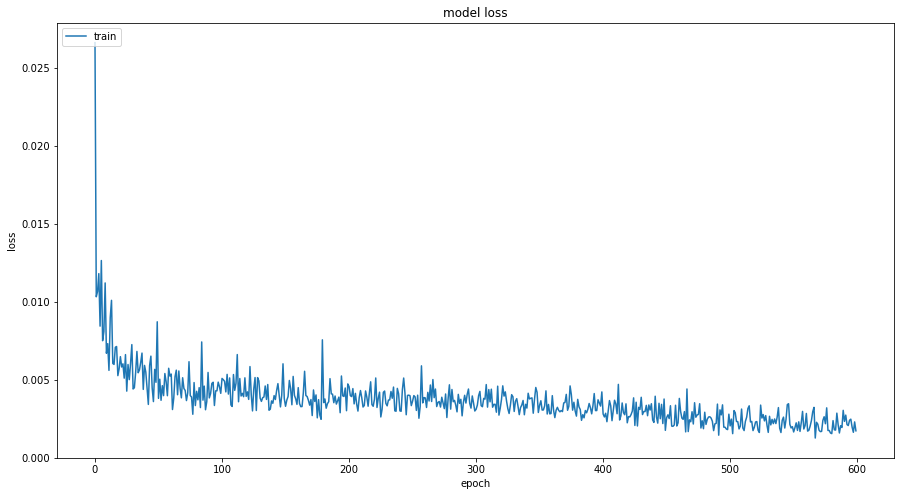

In [10]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [11]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 4ms/step - loss: 0.0386 - mae: 0.1331
score is: test_loss 0.038554, mae 0.133117


In [12]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



0.71273404
0.6676734
0.61660206
0.5827501
0.58332473
0.6176739
0.6216006
0.60046023
0.5553621
0.49406236
The predicted perday spread from  2004/3/21 is
[[3037.093 ]
 [2537.8215]
 [1971.9509]
 [1596.871 ]
 [1603.238 ]
 [1983.8265]
 [2027.3351]
 [1793.0995]
 [1293.4121]
 [ 614.211 ]]


In [13]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(actual)


[[ 4478.]
 [ 3402.]
 [ 3423.]
 [ 2297.]
 [ 2762.]
 [ 2379.]
 [ 2762.]
 [ 3030.]
 [-4860.]
 [    0.]]


MSE = 0.042403721025943746
R-Squared Score = 0.2103678196916361


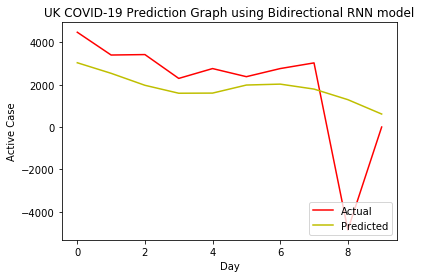

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('UK COVID-19 Prediction Graph using Bidirectional RNN model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)